# **Project Stage I: Data and Project Understanding**
## Enrichment Datasets for COVID-19 NC(North Carolina) State
## [Census Demographic ACS](https://data.census.gov/cedsci/table?q=dp&tid=ACSDP1Y2018.DP05)
## [Employment Dataset](https://www.bls.gov/cew/downloadable-data-files.html)

## Task 2
### Team:
- Create a team notebook to read in the COVID-19 data (cases, deaths, and population) using pandas and display the dataframe in a notebook.
- Merge all the three variables (cases, deaths, and population) to create a super COVID-19 datafame. Export it to a .csv format. 
### Individual:
- Calculate COVID-19 data trends for the last week of the data. Are the cases increasing, decreasing, or stable? Each student chooses a state to analyze.
- Each student member creates notebooks to read the Enrichment data and displays them in a notebook.
- Each student member performs initial merges with the COVID-19 data using the variables in the Enrichment data. 

In [135]:
import os # operating system
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import random
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

##### We have imported all required libraries for Team task, Covid-19 data analysis

In [136]:
USCovid19DF = pd.read_csv("..\\..\\Data\\US_Covid_19_Dataset.csv")#,parse_dates=['ReportDate'], index_col = "ReportDate"
USCensusDemoDF = pd.read_csv("..\\..\\Data\\Census_Demographic_ACS.csv", low_memory=False)
USEmpStCntyDF = pd.read_excel("..\\..\\Data\\Employment_Dataset.xlsx", sheet_name='US_St_Cn_MSA', engine='openpyxl')
USEmpPRVIDF = pd.read_excel("..\\..\\Data\\Employment_Dataset.xlsx", sheet_name='US_PR_VI', engine='openpyxl')

##### We have downloaded latest data from provided website *Census Demographic ACS* for below datasets & Team prepared Covid19 Dataset. 
###### Latest US County level data available for all states
- Combined Covid19 Confirmed, Death & Population Dataset
- US Census Demographic ACS dataset
- Employment Dataset with 2 sheets

In [137]:
USCovid19DF['Population']=USCovid19DF['Population'].astype('Int64')
USCovid19DF['ReportDate'] = pd.to_datetime(USCovid19DF['ReportDate'], format='%Y-%m-%d')
USCovid19DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397943 entries, 0 to 2397942
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ReportDate         datetime64[ns]
 1   StateFIPS          int64         
 2   State              object        
 3   StateName          object        
 4   CountyFIPS         int64         
 5   CountyName         object        
 6   ConfirmCasesCount  int64         
 7   DeathCount         int64         
 8   Population         Int64         
dtypes: Int64(1), datetime64[ns](1), int64(4), object(3)
memory usage: 166.9+ MB


###### Exported Python Dataframe data into csv file and stored under Data directory named: US_Covid_19_Dataset.csv & modified
- Converted Population column datatype from Float to Int
- Converted ReportDate datatype from Object to Date datatype

In [138]:
USCensusDemoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Columns: 358 entries, DP05_0001E to NAME
dtypes: object(358)
memory usage: 8.8+ MB


##### Verified US census Demographics data set 
- It has 3221 Observations
- Total 358 columns
- Firstrow with US Census code columns and 2nd row has actual column Names

In [139]:
USEmpStCntyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62790 entries, 0 to 62789
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Area
Code                                      62790 non-null  object 
 1   St                                             56079 non-null  object 
 2   Cnty                                           56079 non-null  float64
 3   Own                                            62790 non-null  int64  
 4   NAICS                                          62790 non-null  int64  
 5   Year                                           62790 non-null  int64  
 6   Qtr                                            62790 non-null  int64  
 7   Area Type                                      62790 non-null  object 
 8   St Name                                        56061 non-null  object 
 9   Area                                           627

##### US Employment data has 62,790 rows and 21 columns based on first sheet under exported dataset and all are non null columns.Its wide dataset as well

In [140]:
USEmpPRVIDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Area
Code                                      1546 non-null   object 
 1   St                                             1425 non-null   object 
 2   Cnty                                           1425 non-null   float64
 3   Own                                            1546 non-null   int64  
 4   NAICS                                          1546 non-null   int64  
 5   Year                                           1546 non-null   int64  
 6   Qtr                                            1546 non-null   int64  
 7   Area Type                                      1546 non-null   object 
 8   St Name                                        1407 non-null   object 
 9   Area                                           1546 

##### US Employment data has 1,546 rows and 21 columns based on first sheet under exported dataset and all are non null columns.Its wide dataset as well

### Calculate COVID-19 data trends for the last week of the data. Are the cases increasing, decreasing, or stable? Each student chooses a state to analyze.

In [141]:
USCovid19NCDF = USCovid19DF[USCovid19DF['State'] == 'NC'].sort_values(by='ReportDate', ascending=False)
USCovid19NCDF

,ReportDate,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
2396773,2022-02-10,37,NC,North Carolina,37199,Yancey County,4602,49,18069
2396710,2022-02-10,37,NC,North Carolina,37073,Gates County,1764,19,11562
2396700,2022-02-10,37,NC,North Carolina,37053,Currituck County,4634,32,27763
2396701,2022-02-10,37,NC,North Carolina,37055,Dare County,7111,21,37009
2396702,2022-02-10,37,NC,North Carolina,37057,Davidson County,41752,373,167609
...,...,...,...,...,...,...,...,...,...
1994,2020-01-22,37,NC,North Carolina,37141,Pender County,0,0,63060
1995,2020-01-22,37,NC,North Carolina,37143,Perquimans County,0,0,13463
1996,2020-01-22,37,NC,North Carolina,37145,Person County,0,0,39490
1997,2020-01-22,37,NC,North Carolina,37147,Pitt County,0,0,180742


##### I have filtered NC State from combined COVID19 data set and arranged by ReportDate latest values.
- It contains 75,851 rows and 9 columns

In [142]:
USCovid19NCLstWkDF = USCovid19NCDF.loc[USCovid19NCDF["ReportDate"]>= '2022-02-03']
USCovid19NCLstWkDF

,ReportDate,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
2396773,2022-02-10,37,NC,North Carolina,37199,Yancey County,4602,49,18069
2396710,2022-02-10,37,NC,North Carolina,37073,Gates County,1764,19,11562
2396700,2022-02-10,37,NC,North Carolina,37053,Currituck County,4634,32,27763
2396701,2022-02-10,37,NC,North Carolina,37055,Dare County,7111,21,37009
2396702,2022-02-10,37,NC,North Carolina,37057,Davidson County,41752,373,167609
...,...,...,...,...,...,...,...,...,...
2374393,2022-02-03,37,NC,North Carolina,37141,Pender County,14181,109,63060
2374396,2022-02-03,37,NC,North Carolina,37147,Pitt County,49686,146,180742
2374391,2022-02-03,37,NC,North Carolina,37137,Pamlico County,2448,27,12726
2374390,2022-02-03,37,NC,North Carolina,37135,Orange County,23608,120,148476


##### As per problem statement, I have taken latest one week NC Covid data  data, which shows 808 rows and 9 columns from Feb 3rd to Feb 10th 2022

In [143]:
USCovid19NCLstWkDFAgg=USCovid19NCLstWkDF.groupby(['ReportDate', 'StateFIPS','State']).agg(TotalConfirmCasesCount=('ConfirmCasesCount', 'sum'), TotalDeathCount=('DeathCount', 'sum'), TotalPopulation=('Population', 'sum')).reset_index().sort_values('ReportDate', ascending=False)
USCovid19NCLstWkDFAgg

,ReportDate,StateFIPS,State,TotalConfirmCasesCount,TotalDeathCount,TotalPopulation
7,2022-02-10,37,NC,2518195,21580,10488084
6,2022-02-09,37,NC,2509470,21482,10488084
5,2022-02-08,37,NC,2498957,21325,10488084
4,2022-02-07,37,NC,2494309,21249,10488084
3,2022-02-06,37,NC,2470242,21097,10488084
2,2022-02-05,37,NC,2470242,21097,10488084
1,2022-02-04,37,NC,2470242,21097,10488084
0,2022-02-03,37,NC,2457857,21027,10488084


##### In order to see the NC Covid Cases trends by daywise
- I have aggregated data based on Report Date, StateFIPS & State
- I got above aggregate table by report date descending order
- It shows that day to day its Death count increased and during the weekend numbers are same , may not be reported on Feb 4th, 5th & 6th.
- Daily Death count average 100 its increased for population 10.4Million.

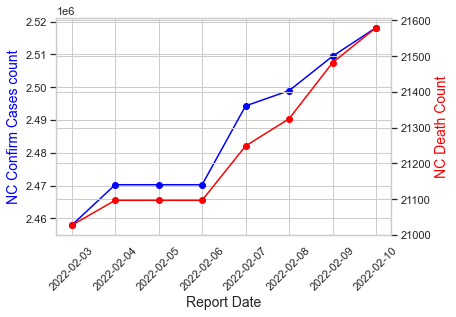

In [145]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(USCovid19NCLstWkDFAgg.ReportDate, USCovid19NCLstWkDFAgg.TotalConfirmCasesCount, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("Report Date",fontsize=14)
plt.xticks(rotation = 45)
# set y-axis label
ax.set_ylabel("NC Confirm Cases count",color="blue",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(USCovid19NCLstWkDFAgg.ReportDate, USCovid19NCLstWkDFAgg.TotalDeathCount,color="red",marker="o")
ax2.set_ylabel("NC Death Count",color="red",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

##### Plotted visualization between NC Covid Confirmed cases vs Death Count for 10.4M population.
- Observed that both Cases & Deaths are correlated
- Weekends from Feb 4th to 6th cases/deaths not reported.
- Both Cases and deaths are increased from Feb 3rd to 10th on avg 100.

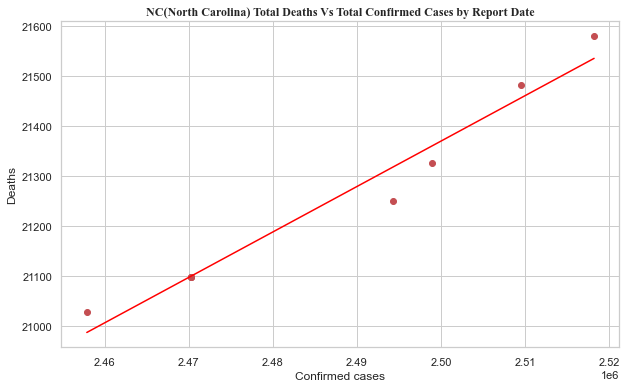

In [146]:
plt.figure(figsize=(10,6))
plt.scatter('TotalConfirmCasesCount','TotalDeathCount',  data = USCovid19NCLstWkDFAgg, c = 'r')
plt.title("NC(North Carolina) Total Deaths Vs Total Confirmed Cases by Report Date", fontname="Times New Roman", size=12,fontweight="bold")
plt.xlabel('Confirmed cases')
plt.ylabel('Deaths')
#obtain m (slope) and b(intercept) of linear regression line
x= USCovid19NCLstWkDFAgg.TotalConfirmCasesCount
y= USCovid19NCLstWkDFAgg.TotalDeathCount
m, b = np.polyfit(x, y, 1)
#use red as color for regression line
plt.plot(x, m*x+b, color='red')
plt.show()

##### Plotted correlation between NC Confirmed cases vs Deaths
-  I see both are highly correlated 
-  Both Cases & Deaths are increasing linearly.
-  For every increase of 10K Confirmed Cases 100 deaths increasing. 
-  This means for every 10K Covid19 cases there are 100 deaths approximately happening.

In [147]:
USCovid19NCCntyDFAgg=USCovid19NCLstWkDF.groupby(['CountyFIPS', 'CountyName','State']).agg(TotalConfirmCasesCount=('ConfirmCasesCount', 'sum'), TotalDeathCount=('DeathCount', 'sum'), TotalPopulation=('Population', 'sum')).reset_index().sort_values('TotalDeathCount', ascending=False)
USCovid19NCCntyDFAgg

,CountyFIPS,CountyName,State,TotalConfirmCasesCount,TotalDeathCount,TotalPopulation
60,37119,Mecklenburg County,NC,2130740,11813,8882848
41,37081,Guilford County,NC,881389,8116,4297392
92,37183,Wake County,NC,2190201,7775,8894088
36,37071,Gaston County,NC,498497,5725,1796232
34,37067,Forsyth County,NC,705963,5663,3058360
...,...,...,...,...,...,...
48,37095,Hyde County,NC,9974,104,39496
3,37005,Alleghany County,NC,22042,88,89096
15,37029,Camden County,NC,13007,72,86936
89,37177,Tyrrell County,NC,7416,56,32128


##### Even for further Weekly analysis at county level instead of State
- Aggregated all Confirm cases & deaths by County for latest week data
- There are 101 counties reported data from Feb 3rd to 10th.
- Arrannged dataset by Total Death count descending order
- Observed that Top Coivd19 Deaths happend in county Mecklenburg and then Guilford, Wake, Gaston, Forsyth counties in the order

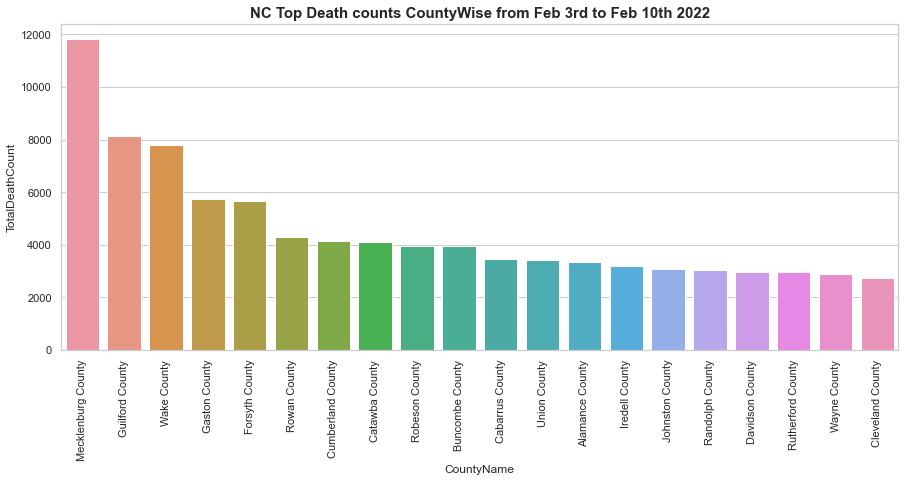

In [148]:
#NC County wise death counts
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,6))
g = sns.barplot(x = 'CountyName', y = 'TotalDeathCount', data = USCovid19NCCntyDFAgg.head(20))
plt.title("NC Top Death counts CountyWise from Feb 3rd to Feb 10th 2022", size=15,fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

##### Plotted NC Covid19 last available week data analysis 
- I have taken Seaborn to plot this and took top 20 counties to show
- Since its comparision taken Barplot by County wise Total Death Count. 
- Mecklenburg county shows 11,813 deaths, Guilford county 8116, Wake county 7775 are the highest in the order.

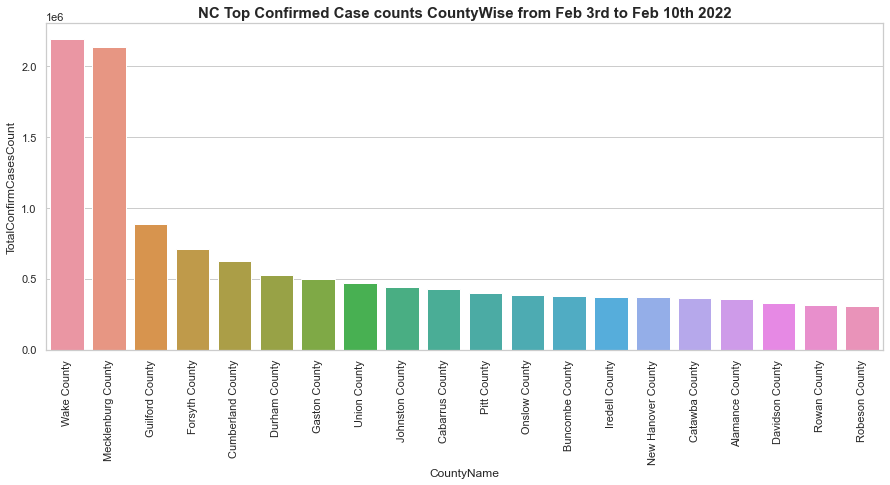

In [149]:
USCovid19NCCntyCCDFAgg=USCovid19NCLstWkDF.groupby(['CountyFIPS', 'CountyName','State']).agg(TotalConfirmCasesCount=('ConfirmCasesCount', 'sum'), TotalDeathCount=('DeathCount', 'sum'), TotalPopulation=('Population', 'sum')).reset_index().sort_values('TotalConfirmCasesCount', ascending=False)
#NC County wise Confirm Cases counts
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,6))
g = sns.barplot(x = 'CountyName', y = 'TotalConfirmCasesCount', data = USCovid19NCCntyCCDFAgg.head(20))
plt.title("NC Top Confirmed Case counts CountyWise from Feb 3rd to Feb 10th 2022", size=15,fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

##### Aggregated & Plotted NC Covid19 last available week data analysis 
- Aggregated data and rearranged by Confirmed Cases Counts
- I have taken Seaborn to plot this and took top 20 counties to show
- Since its comparision taken Barplot by County wise Total Death Count. 
- Wake county shows 2.19Million Cases, Mecklenburg county 2.13M, Guilford county 881K are the highest in the order.
- Guilford County Covid Cases are less compared to other counties but deaths are more.

### Each student member creates notebooks to read the Enrichment data and displays them in a notebook.
### Enrichment Datasets for COVID-19
### [Census Demographic ACS](https://data.census.gov/cedsci/table?q=dp&tid=ACSDP1Y2018.DP05)

In [150]:
USCensusDemoDF = pd.read_csv("..\\..\\Data\\Census_Demographic_ACS.csv", header=1, low_memory=False)
USCensusDemoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Columns: 358 entries, Estimate!!SEX AND AGE!!Total population to Geographic Area Name
dtypes: float64(140), int64(153), object(65)
memory usage: 8.8+ MB


##### US Census Demographic data import
- Imported US Census Demographic data again to USCensusDemoDF 
- Observe that 3220 rows and 358 columns exists

In [151]:
USCensusDemoDF.head()

,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population!!Female,...,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",id,Geographic Area Name
0,55380,*****,55380,(X),26934,166,48.6,0.3,28446,166,...,19823,189,47.6,0.2,21824,97,52.4,0.2,0500000US01001,"Autauga County, Alabama"
1,212830,*****,212830,(X),103496,233,48.6,0.1,109334,233,...,77958,410,47.9,0.2,84925,403,52.1,0.2,0500000US01003,"Baldwin County, Alabama"
2,25361,*****,25361,(X),13421,80,52.9,0.3,11940,80,...,10529,80,53.4,0.3,9199,69,46.6,0.3,0500000US01005,"Barbour County, Alabama"
3,22493,*****,22493,(X),12150,193,54.0,0.9,10343,193,...,9469,102,53.6,0.4,8193,43,46.4,0.4,0500000US01007,"Bibb County, Alabama"
4,57681,*****,57681,(X),28495,142,49.4,0.2,29186,142,...,20833,182,48.8,0.3,21889,168,51.2,0.3,0500000US01009,"Blount County, Alabama"


#### Formatted the enrichment dataset
- Split the Geographic Area Name column into two different columns(County Name and state)
- Rename some of the columns
- Display the new dataset

In [152]:
USCensusDemoDF[['CountyName', 'StateName']] = USCensusDemoDF['Geographic Area Name'].str.split(',', expand=True)
#USCensusDemoDF = USCensusDemoDF.drop(['Geographic Area Name'], 1)
USCensusDemoDF = USCensusDemoDF.rename(columns={'Estimate!!SEX AND AGE!!Total population': 'Estimated Population', 
                          'Estimate!!SEX AND AGE!!Total population!!Under 5 years' : 'Under 5 years', 
                          "Estimate!!SEX AND AGE!!Total population!!5 to 9 years" :  '5 to 9 years',
                          "Estimate!!SEX AND AGE!!Total population!!10 to 14 years" : '10 to 14 years',
                          "Estimate!!SEX AND AGE!!Total population!!15 to 19 years" : '15 to 19 years',
                          "Estimate!!SEX AND AGE!!Total population!!20 to 24 years" : '20 to 24 years', 
                          "Estimate!!SEX AND AGE!!Total population!!25 to 34 years" : '25 to 34 years',
                          "Estimate!!SEX AND AGE!!Total population!!35 to 44 years" : '35 to 44 years',
                          "Estimate!!SEX AND AGE!!Total population!!45 to 54 years" : '45 to 54 years',
                          "Estimate!!SEX AND AGE!!Total population!!55 to 59 years" : '55 to 59 years',
                          "Estimate!!SEX AND AGE!!Total population!!60 to 64 years" : '60 to 64 years',
                          "Estimate!!SEX AND AGE!!Total population!!65 to 74 years" : '65 to 74 years',
                          "Estimate!!SEX AND AGE!!Total population!!75 to 84 years" : '75 to 84 years',
                          "Estimate!!SEX AND AGE!!Total population!!85 years and over" : '85 years and over'
                        })
USCensusDemoDF

,Estimated Population,Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population!!Female,...,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",id,Geographic Area Name,CountyName,StateName
0,55380,*****,55380,(X),26934,166,48.6,0.3,28446,166,...,47.6,0.2,21824,97,52.4,0.2,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama
1,212830,*****,212830,(X),103496,233,48.6,0.1,109334,233,...,47.9,0.2,84925,403,52.1,0.2,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama
2,25361,*****,25361,(X),13421,80,52.9,0.3,11940,80,...,53.4,0.3,9199,69,46.6,0.3,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama
3,22493,*****,22493,(X),12150,193,54.0,0.9,10343,193,...,53.6,0.4,8193,43,46.4,0.4,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama
4,57681,*****,57681,(X),28495,142,49.4,0.2,29186,142,...,48.8,0.3,21889,168,51.2,0.3,0500000US01009,"Blount County, Alabama",Blount County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,52192,*****,52192,(X),24963,*****,47.8,*****,27229,*****,...,47.0,0.1,22062,80,53.0,0.1,0500000US72145,"Vega Baja Municipio, Puerto Rico",Vega Baja Municipio,Puerto Rico
3216,8642,*****,8642,(X),4277,103,49.5,1.2,4365,103,...,50.3,0.1,3449,16,49.7,0.1,0500000US72147,"Vieques Municipio, Puerto Rico",Vieques Municipio,Puerto Rico
3217,22403,*****,22403,(X),10856,*****,48.5,*****,11547,*****,...,47.4,0.2,9197,2,52.6,0.2,0500000US72149,"Villalba Municipio, Puerto Rico",Villalba Municipio,Puerto Rico
3218,33499,*****,33499,(X),16202,*****,48.4,*****,17297,*****,...,47.6,0.1,14129,41,52.4,0.1,0500000US72151,"Yabucoa Municipio, Puerto Rico",Yabucoa Municipio,Puerto Rico


In [154]:
JoinKeys = ['StateName', 'CountyName']
USCensusDemoDF['StateName'] = USCensusDemoDF["StateName"].str.strip()
USCensusDemoDF['CountyName'] = USCensusDemoDF["CountyName"].str.strip()
USCovid19NCCensusDemoDF = pd.merge(USCovid19NCDF, USCensusDemoDF, on=JoinKeys, how='left')
USCovid19NCCensusDemoDF.head()

,ReportDate,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population,Estimated Population,...,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",id,Geographic Area Name
0,2022-02-10,37,NC,North Carolina,37199,Yancey County,4602,49,18069,17760.0,...,6796.0,76.0,48.2,0.4,7292.0,85.0,51.8,0.4,0500000US37199,"Yancey County, North Carolina"
1,2022-02-10,37,NC,North Carolina,37073,Gates County,1764,19,11562,11548.0,...,4464.0,22.0,48.7,0.2,4693.0,22.0,51.3,0.2,0500000US37073,"Gates County, North Carolina"
2,2022-02-10,37,NC,North Carolina,37053,Currituck County,4634,32,27763,26363.0,...,9969.0,119.0,49.0,0.4,10374.0,67.0,51.0,0.4,0500000US37053,"Currituck County, North Carolina"
3,2022-02-10,37,NC,North Carolina,37055,Dare County,7111,21,37009,36222.0,...,13872.0,192.0,49.1,0.5,14352.0,202.0,50.9,0.5,0500000US37055,"Dare County, North Carolina"
4,2022-02-10,37,NC,North Carolina,37057,Davidson County,41752,373,167609,165381.0,...,59606.0,336.0,48.2,0.1,64165.0,326.0,51.8,0.1,0500000US37057,"Davidson County, North Carolina"


##### We have merged US Covid19 Combined NC dataset with Enrichment Data US Census Demographic Set by using below steps.
- Taken all common columns between data sets. i.e. StateName, CountyName
- Also to avoid missing data due to joins, we have used Left join on enrichment data.
- So merged based on above columns and verified data, they are all looks good

In [155]:
USCovid19NCCensusDemoDF.shape

(75851, 367)

In [156]:
USCovid19NCCensusDemoDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75851 entries, 0 to 75850
Columns: 367 entries, ReportDate to Geographic Area Name
dtypes: Int64(1), datetime64[ns](1), float64(293), int64(4), object(68)
memory usage: 213.0+ MB


##### Combined US Covid19 data with Census Geographic data shows 75,851 observations and 367 columns and looks good. I may need to drop unnessesary columns from Census Demo data.